## Import libraries

In [20]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()

### Load data and build data frame

In [21]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)

In [23]:
list(iris.target_names)


['setosa', 'versicolor', 'virginica']

### Visual EDA

In [24]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


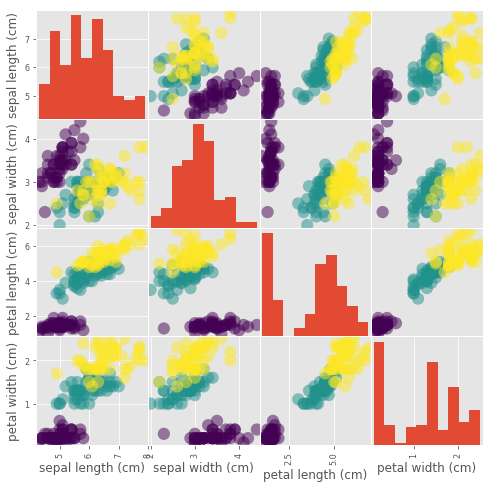

In [25]:
_= pd.plotting.scatter_matrix(iris_df, c=y, figsize=[8,8], s=150, marker='A')

### Classifier (k-Nearest Neighbor)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

#### Train/Test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y) 

### Perform fititng with 'knn' and accuracy check

In [50]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [51]:
knn.score(x_test, y_test)

0.9777777777777777

### Error visualization for k value selection

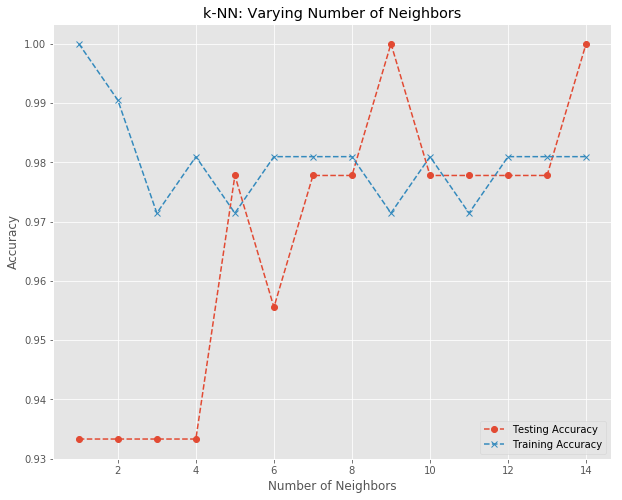

In [52]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.figure(figsize=(10, 8))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, '--o',label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, '--x',label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
_=plt.ylabel('Accuracy')

From the graph above, it is obvious that our training and prediction accuracy depends on the 'n_neighbors' value selected. Careful consideration to be made to avoid overfirring or underfitting.